In [53]:
# %% [markdown]
"""
# Análise e Modelagem de Produtos Agrícolas

Este notebook tem como objetivo:

- Explorar uma base de dados contendo informações de solo e clima;
- Realizar uma análise descritiva (incluindo pelo menos cinco gráficos);
- Identificar o perfil ideal de condições para diferentes culturas;
- Desenvolver e comparar cinco modelos preditivos (Random Forest, SVM, KNN, Regressão Logística e Redes Neurais) 
que indiquem o melhor produto agrícola a ser cultivado.

"""

# %% [code]
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier



In [54]:
# %% [markdown]
"""
## 1. Carregamento e Pré-processamento dos Dados

Na base de dados, verificar o tipo de cada variável, identificar valores nulos e aplicar eventuais pré-processamentos necessários.

"""

# %% [code]
# Carregar a base de dados
df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")

# Visualizar as primeiras linhas
print(df.head())

# Informações gerais do dataset
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

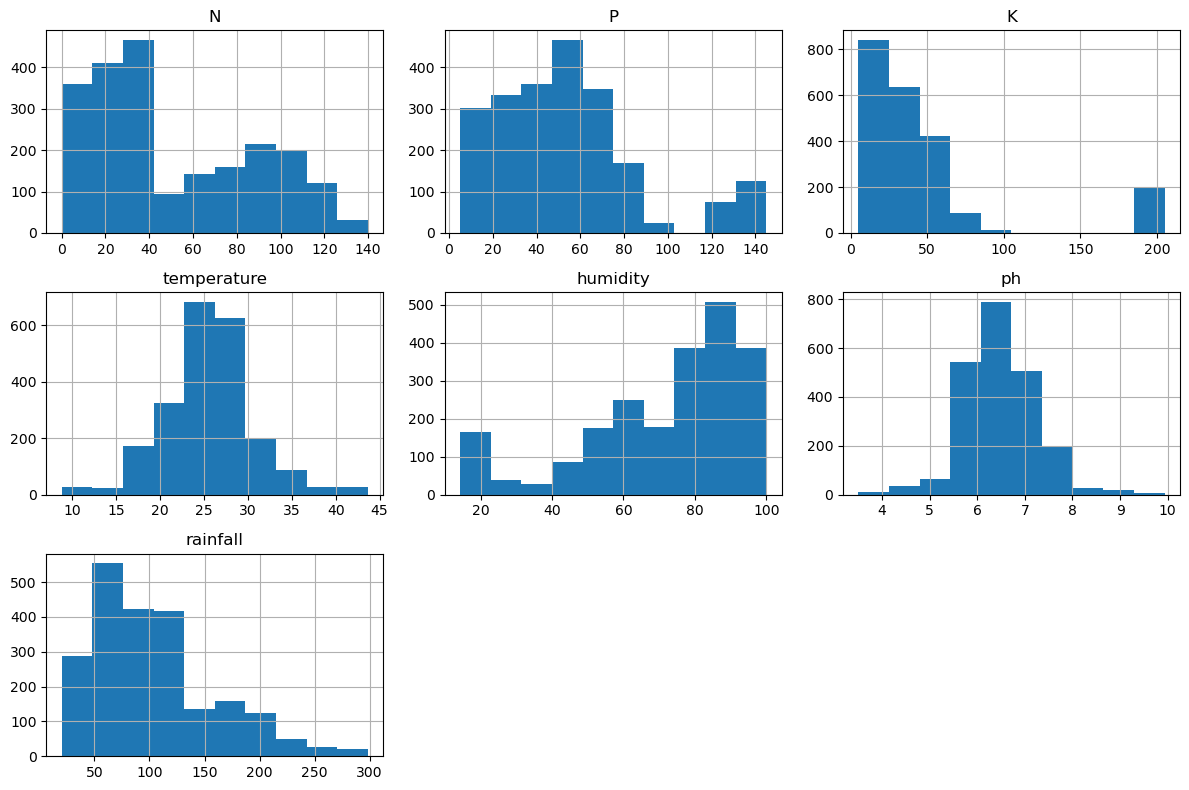

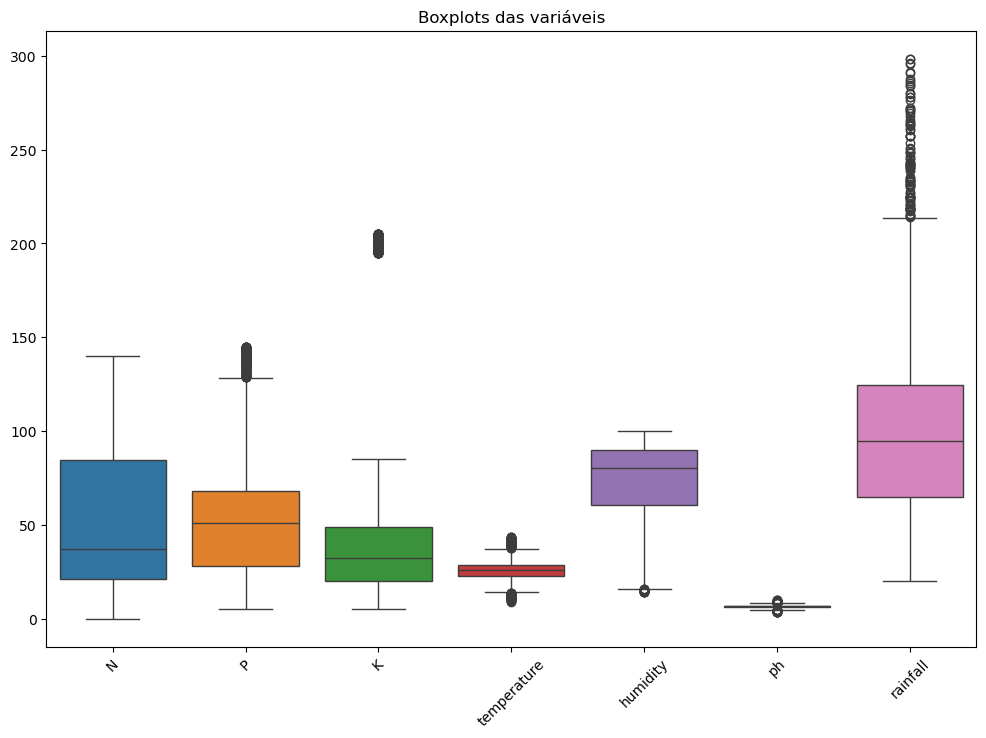

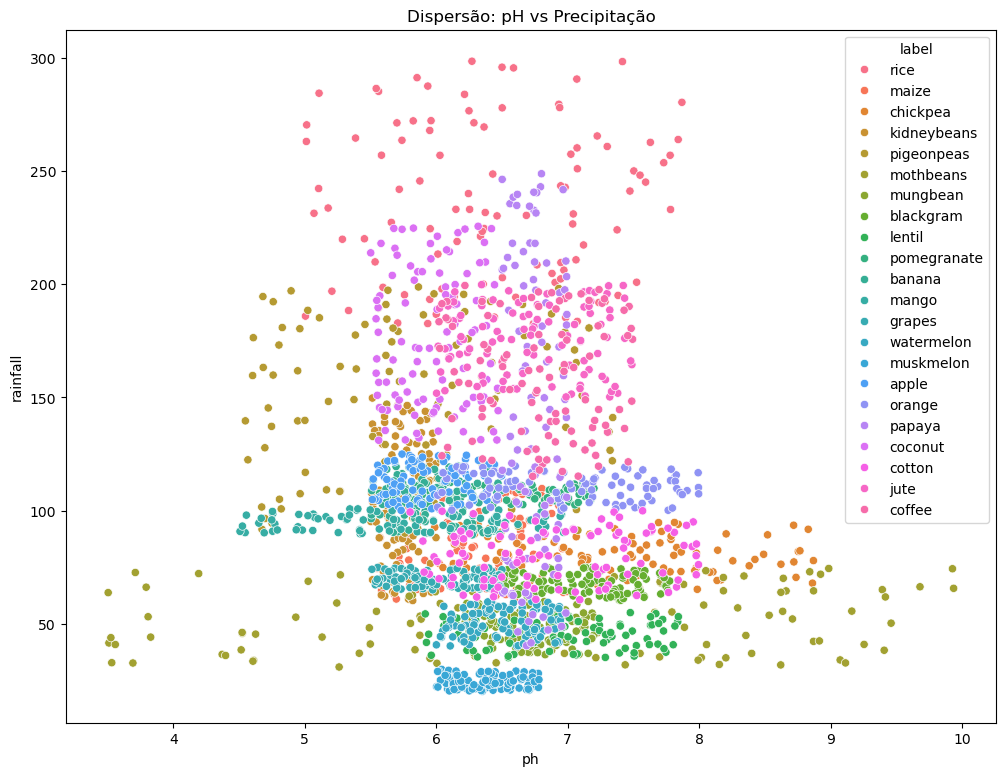

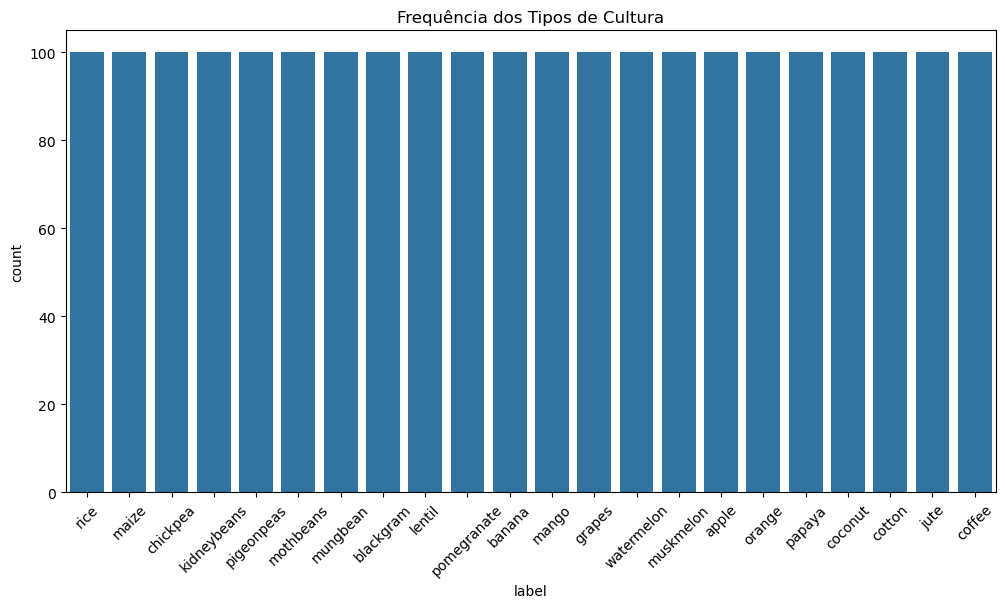

In [55]:
# %% [markdown]
"""
## 2. Análise Exploratória de Dados

Visualizar as distribuições das variáveis e explorar as relações entre elas. Incluir, por exemplo, histogramas, boxplots, gráficos 
de dispersão e uma matriz de correlação.

"""

# Carregar a base de dados
df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")


# %% [code]
# Histogramas das variáveis numéricas
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# %% [code]
# Boxplots para visualizar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots das variáveis")
plt.show()

# %% [code]
# Heatmap de correlação
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Matriz de Correlação")
# plt.show()

# %% [code]
# Gráfico de dispersão exemplo: pH vs rainfall
plt.figure(figsize=(12, 9))
sns.scatterplot(x="ph", y="rainfall", data=df, hue="label")
plt.title("Dispersão: pH vs Precipitação")
plt.show()

# %% [code]
# Distribuição da variável alvo "label"
plt.figure(figsize=(12, 6))
sns.countplot(x="label", data=df)
plt.title("Frequência dos Tipos de Cultura")
plt.xticks(rotation=45)
plt.show()


Perfil médio por cultura:
                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize         77.76   48.

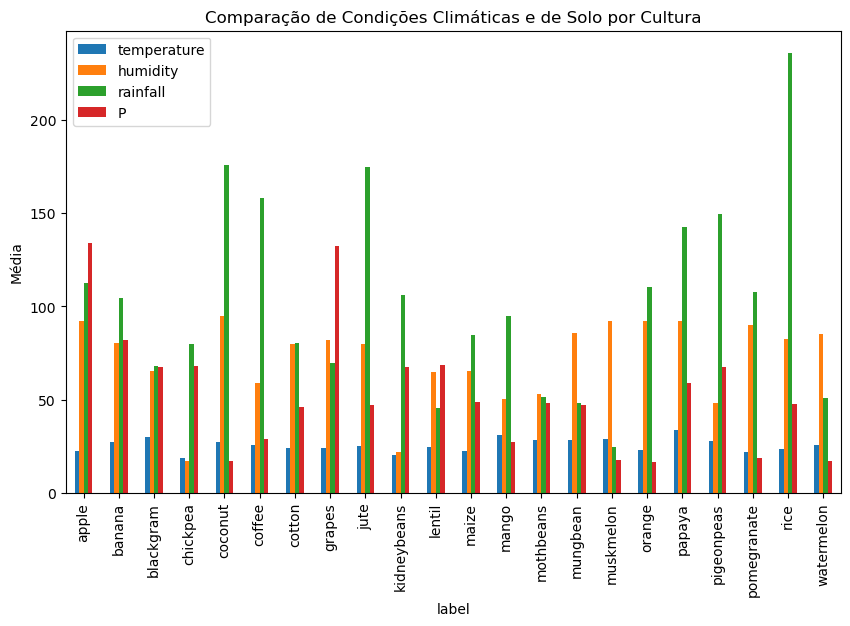

In [56]:
# %% [markdown]
"""
## 3. Definição do Perfil Ideal e Análise Comparativa

Agrupar os dados por cultura (label) e calcular medidas como média, mediana e desvio padrão para cada variável. 
Comparar os perfis entre três culturas escolhidas.

"""

# %% [code]
# Agrupar por label e calcular médias
perfil_medio = df.groupby("label").mean()
print("Perfil médio por cultura:")
print(perfil_medio)

# Você pode incluir gráficos de barras para comparar, por exemplo, os níveis de umidade, temperatura e nutrientes entre as culturas.
perfil_medio[['temperature', 'humidity', 'rainfall', 'P']].plot(kind='bar', figsize=(10,6))
plt.title("Comparação de Condições Climáticas e de Solo por Cultura")
plt.ylabel("Média")
plt.show()


In [57]:
# %% [markdown]
"""
## 4. Modelagem Preditiva

Desenvolver cinco modelos para prever o tipo de cultura. 
Separar as variáveis independentes (X) e a variável alvo (y).

"""

# Carregar a base de dados
df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")


# %% [code]
# Preparação dos dados para modelagem
X = df.drop(columns=["label"])
y = df["label"]

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [58]:
# %% [markdown]
"""
### 4.1 Modelo: Random Forest
"""

# %% [code]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia Random Forest: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))


Acurácia Random Forest: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

In [59]:
# %% [markdown]
"""
### 4.2 Modelo: Support Vector Machine (SVM)
"""

# %% [code]
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia SVM: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))


Acurácia SVM: 0.98
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      pa

In [60]:
# %% [markdown]
"""
### 4.3 Modelo: K-Nearest Neighbors (KNN)
"""

# %% [code]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia KNN: {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))


Acurácia KNN: 0.97
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      pa

In [61]:
# %% [markdown]
"""
### 4.4 Modelo: Regressão Logística
"""

# %% [code]
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia Regressão Logística: {accuracy_lr:.2f}")
print(classification_report(y_test, y_pred_lr))


Acurácia Regressão Logística: 0.94
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.75      0.75      0.75        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.71      0.91      0.80        11
       maize       0.94      0.81      0.87        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.87      0.83      0.85        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00   

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# %% [markdown]
"""
### 4.5 Modelo: Redes Neurais (MLP)
"""

# %% [code]
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia Redes Neurais: {accuracy_mlp:.2f}")
print(classification_report(y_test, y_pred_mlp))


Acurácia Redes Neurais: 0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.89      0.80      0.84        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.86      0.83      0.84        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.77      0.91      0.83        11
       maize       0.94      0.76      0.84        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.88      0.96      0.92        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

C:\Users\User\AppData\Local\Temp\ipykernel_1348\783014467.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


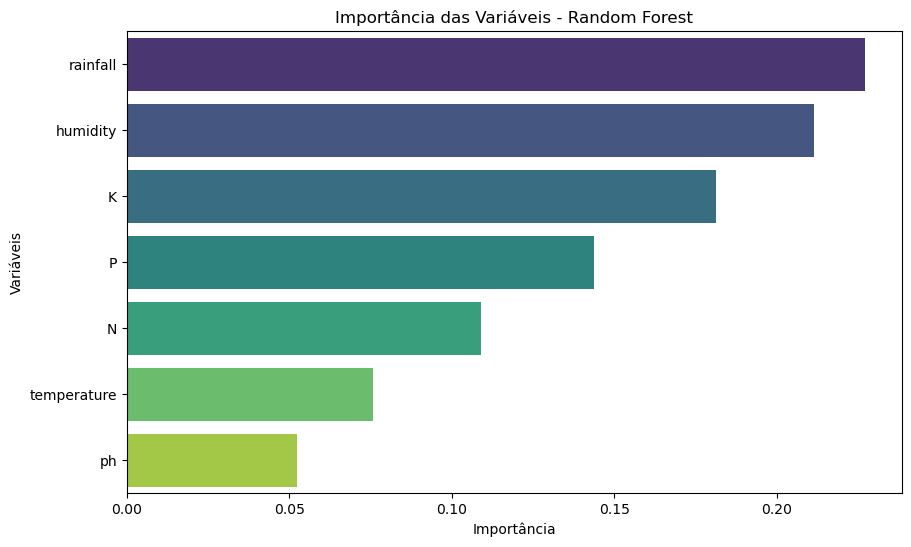

In [63]:
# %% [markdown]
"""
## 5. Comparação dos Modelos e Conclusões

## Comparação de Acurácias:
Os modelos exibiram as seguintes acurácias:
•	Random Forest: 99%
•	SVM: 98%
•	KNN: 97%
•	Regressão Logística: 94%
•	Redes Neurais (MLP): 95%

## Pontos Fortes e Limitações:
•	Random Forest teve a melhor performance global, sendo robusto em diferentes classes. Seu desempenho é ótimo para capturar interações complexas 
entre variáveis, mas pode ser mais lento e menos interpretável.

•	SVM demonstrou alta precisão, especialmente em classes bem separadas. No entanto, o custo computacional pode ser elevado conforme o tamanho 
do conjunto de dados cresce.

•	KNN teve uma acurácia relativamente alta, mas apresenta desafios em termos de eficiência para conjuntos grandes, devido à necessidade de 
calcular distâncias para cada nova predição.

•	Regressão Logística foi o modelo com menor acurácia, possivelmente devido à linearidade dos dados. Além disso, o aviso de ConvergenceWarning 
sugere que ajustes nos hiperparâmetros ou pré-processamento podem ser necessários.

•	Redes Neurais (MLP) mostraram desempenho robusto, ficando acima da regressão logística, mas abaixo dos modelos de árvore. Dependem de um 
bom ajuste de hiperparâmetros para evitar problemas como overfitting.

## Variáveis de Maior Impacto:
Embora os dados exatos das variáveis mais influentes não estejam explicitamente detalhados, modelos como Random Forest permitem análise de 
importância das variáveis. Em geral, fatores como clima, tipo de solo e características nutricionais tendem a ter maior peso na predição de cultivos.

## Perfil Ideal e Relação com Diferentes Culturas
O perfil ideal identificado tende a favorecer cultivos específicos conforme suas necessidades ambientais. Algumas observações:
•	Culturas como banana, coco e café mostram excelente classificação, sugerindo alta previsibilidade baseada nos fatores ambientais.
•	Juta, lentilha e arroz apresentaram pequenas oscilações na precisão de alguns modelos, o que pode indicar maior sensibilidade a variações nos dados.
•	O impacto dos fatores ambientais na previsão pode estar relacionado à regionalização da agricultura. Por exemplo, um modelo que capta padrões 
climáticos distintos pode ser mais eficiente na predição de cultivos em diferentes regiões.

## Visualizações e Comentários Adicionais:
Uma análise gráfica pode revelar mais sobre o comportamento dos modelos
•	Gráfico de importância das variáveis no Random Forest.

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obter as importâncias das variáveis
importances = rf_model.feature_importances_

# Criar um DataFrame para facilitar a visualização
feature_names = X_train.columns  # Nome das variáveis
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar as variáveis pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - Random Forest')
plt.show()





In [64]:
# %% [markdown]
"""
## Conclusão

Exploramos a base de dados, realizamos análises descritivas e implementamos cinco algoritmos de Machine Learning para prever 
o tipo de cultura agrícola.   

Sua análise permitiu compreender melhor as condições ideais de solo e clima para diferentes culturas agrícolas, além de avaliar a eficácia dos 
métodos preditivos. 

O desempenho dos modelos variou, e o Random Forest se destacou pela sua alta precisão.

"""


'\n## Conclusão\n\nExploramos a base de dados, realizamos análises descritivas e implementamos cinco algoritmos de Machine Learning para prever o tipo de cultura agrícola.   \n\nSua análise permitiu compreender melhor as condições ideais de solo e clima para diferentes culturas agrícolas, além de avaliar a eficácia dos \nmétodos preditivos. \n\nO desempenho dos modelos variou, e o Random Forest se destacou pela sua alta precisão.\n\n'